<a href="https://colab.research.google.com/github/asrithasri/IIT-Bombay-Assigment/blob/main/Age_Wise_Excess_Death_Analysis_USA_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/IIT bombay Internsip folder/US CDC AH_Excess_Deaths_by_Sex__Age__and_Race - 21jan2022byage.csv')
df.head()

,AnalysisDate,Time Period,MMWRyear,MMWRweek,Weekending,RaceEthnicity,Sex,AgeGroup,Deaths (weighted),COVID19 (weighted),Deaths (unweighted),COVID19 (unweighted),Average number of deaths (weighted),Average number of deaths (unweighted),Number above average (weighted),Percent above average (weighted),Number above average (unweighted),Percent above average (unweighted),Footnote,Geography
0,01/16/2022,2015-2019,2015,1,01/10/2015,All Race/Ethnicity Groups,All Sexes,0-14 Years,624,0,624,0,615,615,NaN,NaN,NaN,NaN,NaN,United States
1,01/16/2022,2015-2019,2015,2,01/17/2015,All Race/Ethnicity Groups,All Sexes,0-14 Years,664,0,664,0,605,605,NaN,NaN,NaN,NaN,NaN,United States
2,01/16/2022,2015-2019,2015,3,01/24/2015,All Race/Ethnicity Groups,All Sexes,0-14 Years,616,0,616,0,600,600,NaN,NaN,NaN,NaN,NaN,United States
3,01/16/2022,2015-2019,2015,4,01/31/2015,All Race/Ethnicity Groups,All Sexes,0-14 Years,620,0,620,0,603,603,NaN,NaN,NaN,NaN,NaN,United States
4,01/16/2022,2015-2019,2015,5,02/07/2015,All Race/Ethnicity Groups,All Sexes,0-14 Years,614,0,614,0,613,613,NaN,NaN,NaN,NaN,NaN,United States


<ipython-input-17-9cb856f55f6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Start Year'] = filtered_data['Time Period'].str.extract('(\d{4})', expand=False).astype(int)
<ipython-input-17-9cb856f55f6a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Excess Deaths %'] = ((filtered_data['Deaths (weighted)'] - avg_deaths) / avg_deaths) * 100


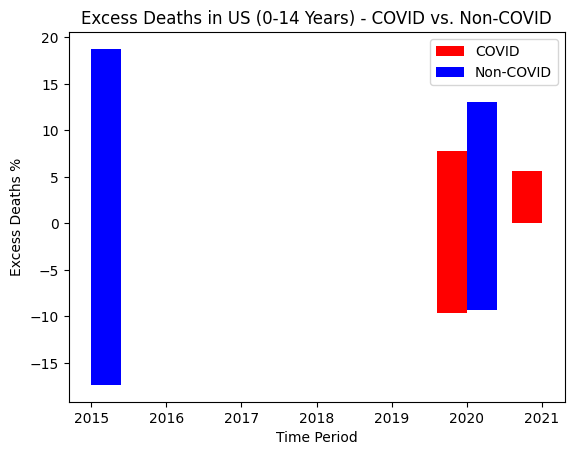

In [17]:


# Filter the data for the specified age group (0-14 years)
filtered_data = df[df['AgeGroup'] == '0-14 Years']

# Extract the start year from the 'Time period' column
filtered_data['Start Year'] = filtered_data['Time Period'].str.extract('(\d{4})', expand=False).astype(int)

# Calculate excess deaths percentage over the 2015-19 average
avg_deaths = filtered_data.groupby('Start Year')['Deaths (weighted)'].transform('mean')
filtered_data['Excess Deaths %'] = ((filtered_data['Deaths (weighted)'] - avg_deaths) / avg_deaths) * 100

# Create a multicolor bar graph
fig, ax = plt.subplots()
# Split the data into COVID and non-COVID using boolean conditions
covid_data = filtered_data[filtered_data['COVID19 (weighted)'] == True]
non_covid_data = filtered_data[filtered_data['COVID19 (unweighted)'] == False]

# Plot the bars
bar_width = 0.4
bar_positions_covid = covid_data['Start Year'] - bar_width / 2
bar_positions_non_covid = non_covid_data['Start Year'] + bar_width / 2

bars_covid = ax.bar(bar_positions_covid, covid_data['Excess Deaths %'], width=bar_width, color='red', label='COVID')
bars_non_covid = ax.bar(bar_positions_non_covid, non_covid_data['Excess Deaths %'], width=bar_width, color='blue', label='Non-COVID')

# Set labels and title
ax.set_xlabel('Time Period')
ax.set_ylabel('Excess Deaths %')
ax.set_title('Excess Deaths in US (0-14 Years) - COVID vs. Non-COVID')

# Add legend
ax.legend()

# Show the plot
plt.show()
